<a href="https://colab.research.google.com/github/leocraig18/Data-Science-Analysis/blob/main/Space_Missions_Analysis_(start)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,Kazakhstan,KAZ


In [ ]:
df_data.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,Kazakhstan,KAZ
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,Kazakhstan,KAZ
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,Kazakhstan,KAZ
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,Kazakhstan,KAZ


In [ ]:
df_data.count()

Unnamed: 0        4324
Unnamed: 0.1      4324
Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price              964
Mission_Status    4324
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
print(f"Any NaN values? {df_data.isna().values.any()}")
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any NaN values? True
Any duplicates? False


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
# The unnamed columns contain junk data and thus can be dropped from the df:
df_data = df_data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [ ]:
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [ ]:
# Convert Date column data from object to datetime type.
df_data.Date = pd.to_datetime(df_data.Date, utc=True)
# Convert Price data to float from object.
  # First need to remove commas from str:
df_data.Price = df_data.Price.str.replace(',', '')
df_data.Price = df_data.Price.astype(float)


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


## Descriptive Statistics

In [ ]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launch_organisations = df_data.groupby('Organisation').size().reset_index(name='launches')
 
launch_organisations.sort_values(by='launches', inplace=True)
top_launch_organisations = launch_organisations[-20:]

In [ ]:
h_bar = px.bar(x=top_launch_organisations.launches,
               y=top_launch_organisations.Organisation,
               orientation='h',
               color=top_launch_organisations.launches,
               color_continuous_scale=px.colors.sequential.haline,
               title='Top 20 Organisations by launches.')
h_bar.update_layout(xaxis_title='Number of Launches', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

Based on the chart above we can see that the USSR have launched the most space missions by a huge margin. This may be because in Russia Space exploration efforts have been largely centralised by the state.

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
df_data["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [ ]:
status_bar = px.bar(x=df_data["Rocket_Status"].value_counts().index,
               y=df_data["Rocket_Status"].value_counts(),
               title='Number of Active versus Retired Rockets')
 
status_bar.update_layout(xaxis_title='Rocket Status', 
                    yaxis_title='Total Rockets')
status_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_success = df_data.Mission_Status.value_counts()
mission_success

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
pie = px.pie(names=mission_success.index, values=mission_success.values,
                    title='How many missions were successful?',
                   )

pie.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
df_clean = df_data.dropna(subset=['Price'])
df_clean.shape
df_clean.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


The dataframe used for this analysis has lots of missing Price values. In order to visualise the data using a histogram and Kernel density estimation I have dropped these NaN values.

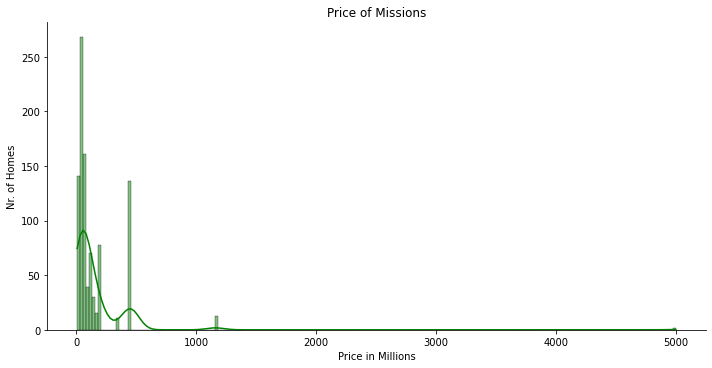

In [ ]:
sns.displot(x=df_clean.Price, 
            aspect=2,
            color='green',
            kde=True)

plt.title('Price of Missions')
plt.xlabel('Price in Millions')
plt.ylabel('Nr. of Homes')

plt.show()


This chart is distorted due to the huge outliers on the upper end of the distribution. In order to get a better visualisation of the data I will drop this value from the datafram.

In [ ]:
df_clean_2 = df_data.dropna(subset=['Price'])
df_clean_2 = df_data[df_data['Price'] < 4500]

In [ ]:
print(df_clean.shape)
df_clean_2.shape

(964, 7)


(962, 7)

Based on the shape of the data. We can see that by removing the outliers we only lose two rows. We can now revisualise our data.

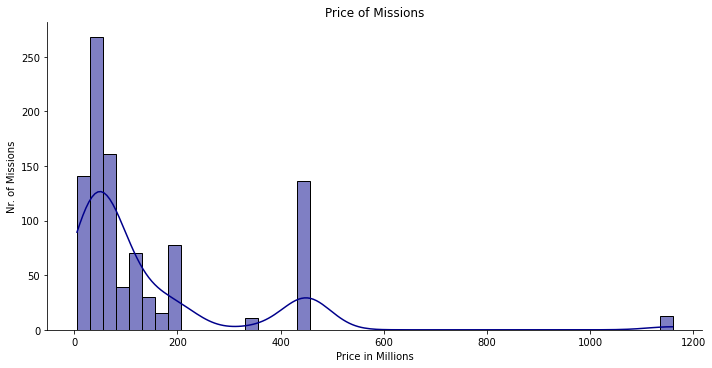

In [ ]:
sns.displot(x=df_clean_2.Price,
            aspect=2,
            color='darkblue',
            kde=True)

plt.title('Price of Missions')
plt.xlabel('Price in Millions')
plt.ylabel('Nr. of Missions')

plt.show()

By removing prices over 1000 again we can visualise our data one more time.

(949, 10)


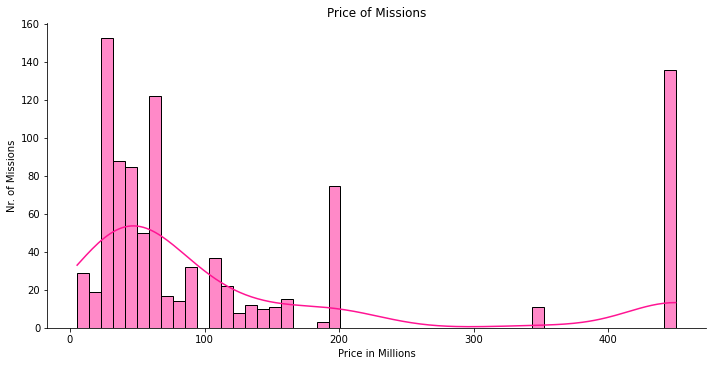

In [ ]:
df_clean_3 = df_data.dropna(subset=['Price'])
df_clean_3 = df_data[df_data['Price'] < 1000]
print(df_clean_3.shape)
sns.displot(x=df_clean_3.Price,
            bins=50,
            aspect=2,
            color='deeppink',
            kde=True)

plt.title('Price of Missions')
plt.xlabel('Price in Millions')
plt.ylabel('Nr. of Missions')

plt.show()

We can see that the majority of missions costed under 200 million USD. However, there are a more than 120 missions costing over 400 million. Furthermore, there have been 15 missions costing more than 1.1 Billion USD and two of these costed 5 Billion USD.

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

We can add a column for the Country of each launch and then use iso3166 to convert the country names to Alpha3 format. 

In [ ]:
df_data['Country'] = df_data['Location'].str.extract(',\s*([^,]+)$')
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country'],
      dtype='object')

We also need to convert country names to the correct format for ISO to give us the correct 3 letter country code.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA



In [ ]:
df_data['Country'] = df_data['Country'].replace(['New Mexico', 'USA'])
df_data['Country'] = df_data['Country'].replace('Russia', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('Yellow Sea', 'China')
df_data['Country'] = df_data['Country'].replace('Shahrud Missile Test Site', 'Iran')
df_data['Country'] = df_data['Country'].replace('Pacific Missile Range Facility', 'USA')
df_data['Country'] = df_data['Country'].replace('Barents Sea', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('Gran Canaria', 'USA')

In [ ]:
df_data.Country[df_data.Country == "Russia"].any()

False

In [ ]:
def convert_to_iso3166(name):
    try:
        return countries.get(name).alpha3
    except:
        return None


In [ ]:
df_data.ISO = df_data['Country'].apply(lambda x: convert_to_iso3166(x))

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,Kazakhstan,KAZ


In [ ]:
df_data.ISO[df_data.ISO == None].any()

False

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
failed_missions = df_data[df_data.Mission_Status == "Failure"]

In [ ]:
df_countries = failed_missions.groupby(['Country', 'ISO'], 
                               as_index=False).agg({'Mission_Status': pd.Series.count})
df_countries.rename(columns={'Mission_Status': 'Failed_Launches'}, inplace=True)
df_countries.sort_values('Failed_Launches', ascending=False)

,Country,ISO,Failed_Launches
7,Kazakhstan,KAZ,149
9,Russian Federation,RUS,92
2,China,CHN,27
3,France,FRA,22
6,Japan,JPN,11
4,India,IND,10
0,Australia,AUS,3
1,Brazil,BRA,2
5,Israel,ISR,2
8,New Zealand,NZL,2


In [ ]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='Failed_Launches', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
df_data["Mission_Status_duplicate"] = df_data.Mission_Status.astype(str)
country_org_success = df_data.groupby(by=['Country', 
                                       'Organisation', 'Mission_Status'], as_index=False).agg({'Mission_Status_duplicate': pd.Series.count})
 
country_org_success = country_org_success.sort_values('Mission_Status_duplicate', ascending=False)

In [ ]:
burst = px.sunburst(country_org_success, 
                    path=['Country', 'Organisation', 'Mission_Status'], 
                    values='Mission_Status_duplicate',
                    title='Where do launches take place and how successful are they?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

In [ ]:
burst = px.sunburst(country_org_success, 
                    path=['Organisation', 'Country', 'Mission_Status'], 
                    values='Mission_Status_duplicate',
                    title='Where do launches take place and how successful are they?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
total_spent = df_data.groupby(by=['Organisation'], as_index=False).sum()
total_spent = total_spent.sort_values('Price', ascending=True)
top_spenders = total_spent[-20:]

In [ ]:
h_bar = px.bar(x=top_spenders.Price,
               y=top_spenders.Organisation,
               orientation='h',
               color=top_spenders.Price,
               color_continuous_scale='Viridis',
               title='Top 20 Organisations by total spending.')
h_bar.update_layout(xaxis_title='Total Spent in Millions USD', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
organisation_counts = df_data.dropna().groupby('Organisation').size().reset_index(name='counts')
merged_df = pd.merge(organisation_counts, total_spent, on='Organisation')

In [ ]:
merged_df['average_price'] = merged_df['Price'] / merged_df['counts']
merged_df = merged_df.sort_values('average_price', ascending=True)
top_20_average = merged_df[-20:]

In [ ]:
merged_df

,Organisation,counts,Price,average_price
17,Rocket Lab,13,97.50,7.50
24,Virgin Orbit,1,12.00,12.00
19,Sandia,1,15.00,15.00
3,EER,1,20.00,20.00
6,ExPace,1,28.30,28.30
10,Kosmotras,22,638.00,29.00
8,ISRO,67,"2,177.00",32.49
11,Lockheed,8,280.00,35.00
4,ESA,1,37.00,37.00
2,CASC,158,"6,340.26",40.13


In [ ]:
h_bar = px.bar(x=top_20_average.average_price,
               y=top_20_average.Organisation,
               orientation='h',
               color=top_20_average.average_price,
               color_continuous_scale='Viridis',
               title='Organisations Average Price Per Launch.')
h_bar.update_layout(xaxis_title='Average in Millions USD', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 